In [1]:
import numpy as np 
import pandas as pd
import pprint
import matplotlib.pyplot as plt 
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.pipeline import Pipeline
import seaborn as sns

In [2]:
# loading Data
df_train= pd.read_csv(r"C:\Users\ACER\Downloads\traindata.csv")
df_test= pd.read_csv(r"C:\Users\ACER\Downloads\testdata.csv")
df_train.head()

,CustomerID,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
0,CusID_00000,36.0,Male,New York City,Divorced,2.0,160.0,32200.0,Service,Yes,Yes,Hybrid,Sedan
1,CusID_00001,15.0,Female,New York City,Single,1.0,143.0,9000.0,Service,Yes,Yes,Petrol,Compact Utility Vehicle
2,CusID_00002,55.0,Male,Paris,Married,2.0,168.0,152400.0,Service,Yes,No,Petrol,Sports Sedan
3,CusID_00003,23.0,Male,Vancouver,Divorced,3.0,165.0,141140.0,Business,Yes,No,Diesel,Sportscar
4,CusID_00004,23.0,Not_Specified,Vancouver,Single,1.0,147.0,38100.0,Service,Yes,Yes,Hybrid,Sports Utility Vehicle


In [3]:
# preprocessing on train 

In [4]:
df_train.describe()

,Age,family_size,height,annual_income
count,29561.000000,29586.000000,29569.000000,29581.000000
mean,30.998545,2.876225,153.023741,84678.162672
std,9.904351,1.633711,11.175516,60802.123202
min,15.000000,1.000000,130.000000,2000.000000
25%,24.000000,1.000000,144.000000,36820.000000
50%,30.000000,3.000000,152.000000,82070.000000
75%,36.000000,4.000000,160.000000,128210.000000
max,60.000000,6.000000,180.000000,499000.000000


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              30000 non-null  object 
 1   Age                     29561 non-null  float64
 2   Gender                  29583 non-null  object 
 3   City                    29577 non-null  object 
 4   is_Married              29580 non-null  object 
 5   family_size             29586 non-null  float64
 6   height                  29569 non-null  float64
 7   annual_income           29581 non-null  float64
 8   job                     29572 non-null  object 
 9   is_physically_ok        29578 non-null  object 
 10  has_taken_car_loan      29569 non-null  object 
 11  preferable_fuel_choice  29572 non-null  object 
 12  vehicle_choice          30000 non-null  object 
dtypes: float64(4), object(9)
memory usage: 3.0+ MB


In [6]:
df_test=df_test.set_index('CustomerID')
df_train=df_train.set_index('CustomerID')

In [7]:
df_train.shape

(30000, 12)

In [8]:
df_train.isna().sum()

Age                       439
Gender                    417
City                      423
is_Married                420
family_size               414
height                    431
annual_income             419
job                       428
is_physically_ok          422
has_taken_car_loan        431
preferable_fuel_choice    428
vehicle_choice              0
dtype: int64

In [9]:
categorical_features=[feature for feature in df_train.columns if((df_train[feature].dtype=='O')&(feature not in ['vehicle_choice']))]

In [10]:
categorical_features

['Gender',
 'City',
 'is_Married',
 'job',
 'is_physically_ok',
 'has_taken_car_loan',
 'preferable_fuel_choice']

In [11]:
for feature in categorical_features:
    print('The feature is {} and number of categories are {}'.format(feature,len(df_train[feature].unique())))

The feature is Gender and number of categories are 8
The feature is City and number of categories are 27
The feature is is_Married and number of categories are 9
The feature is job and number of categories are 9
The feature is is_physically_ok and number of categories are 5
The feature is has_taken_car_loan and number of categories are 6
The feature is preferable_fuel_choice and number of categories are 8


In [13]:
# list of numerical variable
numerical_features=[feature for feature in df_train.columns if((df_train[feature].dtypes !='O')&(feature not in ['vehicle_choice']))]
print('Number of numerical variables:',len(numerical_features))

# visualise the numerical variables
df_train[numerical_features].head()

Number of numerical variables: 4


,Age,family_size,height,annual_income
CustomerID,,,,
CusID_00000,36.0,2.0,160.0,32200.0
CusID_00001,15.0,1.0,143.0,9000.0
CusID_00002,55.0,2.0,168.0,152400.0
CusID_00003,23.0,3.0,165.0,141140.0
CusID_00004,23.0,1.0,147.0,38100.0


In [14]:
df_train.columns

Index(['Age', 'Gender', 'City', 'is_Married', 'family_size', 'height',
       'annual_income', 'job', 'is_physically_ok', 'has_taken_car_loan',
       'preferable_fuel_choice', 'vehicle_choice'],
      dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_train['Gender'] = label_encoder.fit_transform(df_train['Gender'])

df_train['City'] = label_encoder.fit_transform(df_train['City'])
df_train['is_Married'] = label_encoder.fit_transform(df_train['is_Married'])
df_train['job'] = label_encoder.fit_transform(df_train['job'])
df_train['is_physically_ok'] = label_encoder.fit_transform(df_train['is_physically_ok'])
df_train['has_taken_car_loan'] = label_encoder.fit_transform(df_train['has_taken_car_loan'])

df_train['preferable_fuel_choice'] = label_encoder.fit_transform(df_train['preferable_fuel_choice'])
df_train['vehicle_choice'] = label_encoder.fit_transform(df_train['vehicle_choice'])


In [16]:
df_train1=df_train.fillna(method='pad')

In [17]:
df_train1.isna().sum()

Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
vehicle_choice            0
dtype: int64

In [18]:
df_train1

,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice,vehicle_choice
CustomerID,,,,,,,,,,,,
CusID_00000,36.0,1,15,2,2.0,160.0,32200.0,2,3,4,3,10
CusID_00001,15.0,0,15,6,1.0,143.0,9000.0,2,3,4,5,1
CusID_00002,55.0,1,17,3,2.0,168.0,152400.0,2,3,3,5,12
CusID_00003,23.0,1,24,2,3.0,165.0,141140.0,0,3,3,1,14
CusID_00004,23.0,2,24,6,1.0,147.0,38100.0,2,3,4,3,13
...,...,...,...,...,...,...,...,...,...,...,...,...
CusID_29995,24.0,0,25,2,3.0,155.0,91320.0,0,3,3,5,10
CusID_29996,32.0,0,20,3,5.0,163.0,133210.0,0,3,3,1,13
CusID_29997,24.0,0,19,6,1.0,163.0,87300.0,2,3,3,5,7


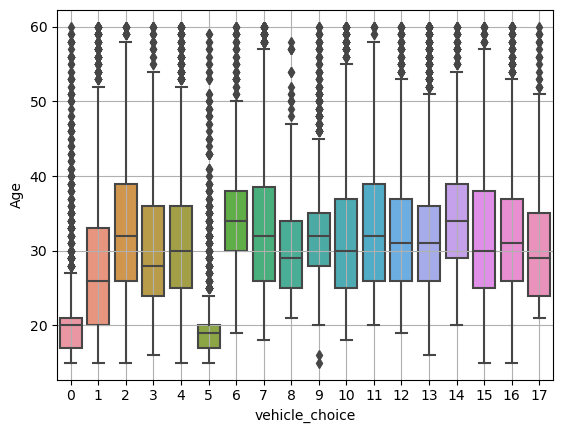

In [20]:
sns.boxplot(x='vehicle_choice',y="Age",data=df_train1)
plt.grid(True)

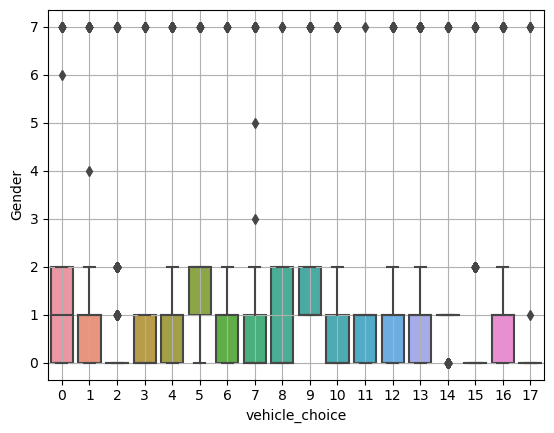

In [21]:
sns.boxplot(x='vehicle_choice',y="Gender",data=df_train1)
plt.grid(True)

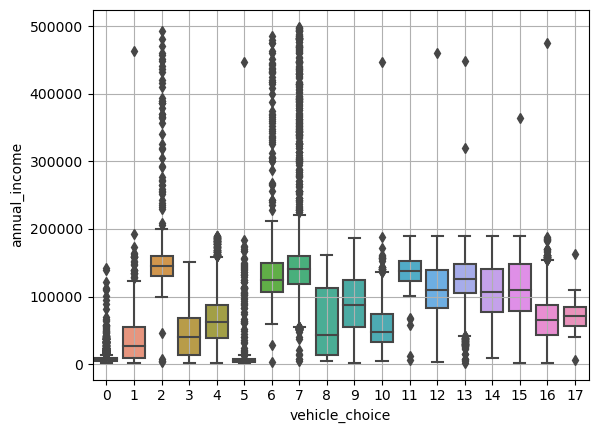

In [22]:
sns.boxplot(x='vehicle_choice',y="annual_income",data=df_train1)
plt.grid(True)

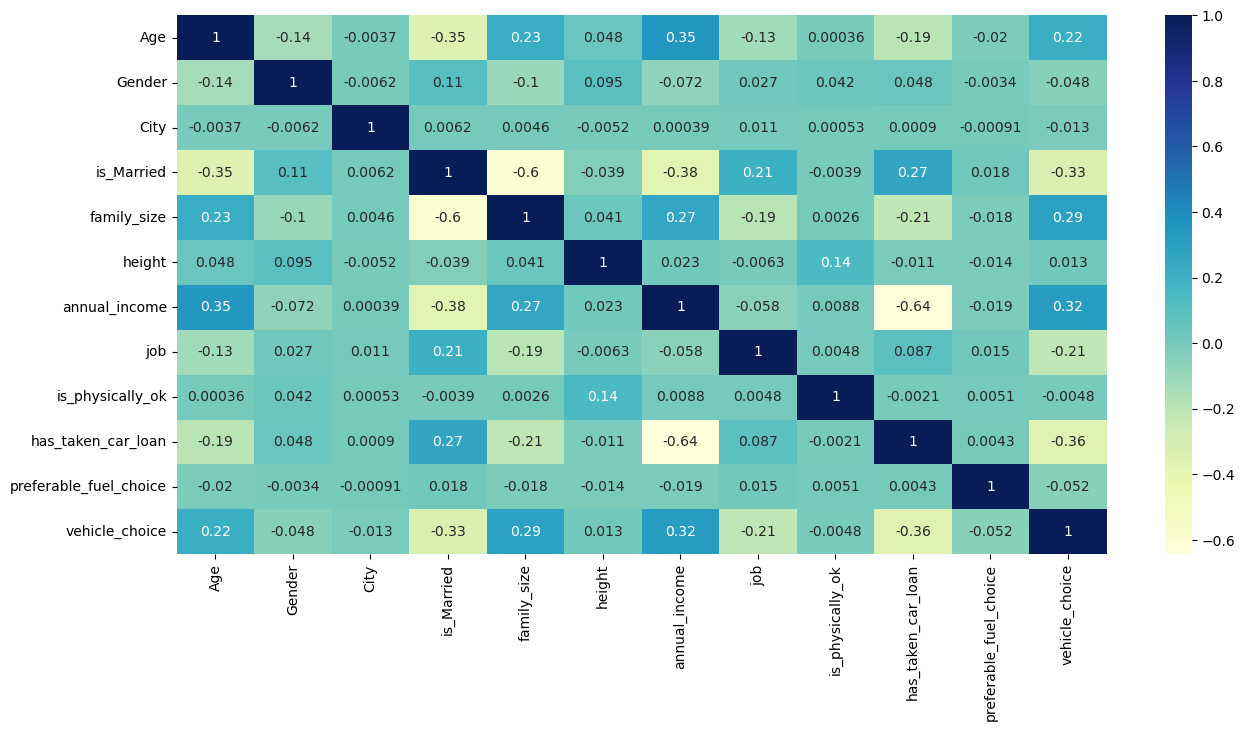

In [38]:
# Checking for correlation
cor_mat=df_train1.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True,cmap='YlGnBu')
plt.show()

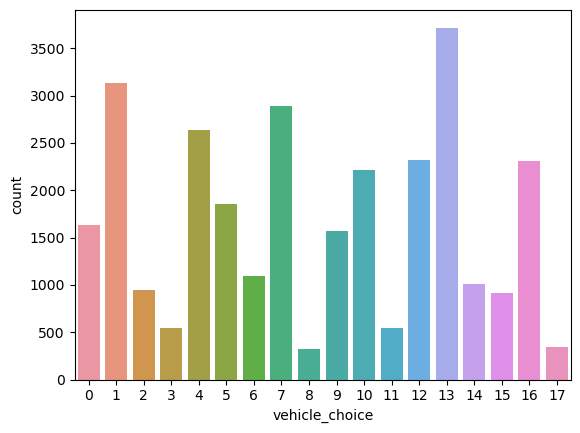

In [39]:
sns.countplot(x='vehicle_choice',data=df_train1)
plt.show()

In [67]:
# MiniMax

In [49]:
from imblearn.under_sampling import RandomUnderSampler
x= df_train1.drop(['vehicle_choice'], axis=1)
y = df_train1['vehicle_choice']

In [50]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train1, X_test1, y_train1, y_test1 = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [51]:
# define the pipeline
from numpy import mean, std
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler


trans = MinMaxScaler()
min_max = MinMaxScaler(feature_range= (0,1))
X_train2 = min_max.fit_transform(X_train1)
X_train2 = pd.DataFrame(X_train2)
X_train2.describe()

,0,1,2,3,4,5,6,7,8,9,10
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,0.354320,0.117313,0.499343,0.460458,0.372314,0.461156,0.166677,0.163929,0.721548,0.624310,0.442932
std,0.219299,0.145241,0.286771,0.206873,0.326987,0.223407,0.121635,0.190706,0.155403,0.131793,0.261917
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.177778,0.000000,0.250000,0.250000,0.000000,0.280000,0.070144,0.000000,0.750000,0.500000,0.142857
50%,0.333333,0.142857,0.500000,0.375000,0.400000,0.440000,0.162038,0.250000,0.750000,0.500000,0.428571
75%,0.466667,0.142857,0.750000,0.750000,0.600000,0.600000,0.254609,0.250000,0.750000,0.750000,0.714286
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
# define and configure the model
model = KNeighborsClassifier()
# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report model performance
print('Accuracy Not Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy Not Scaled: 0.214 (0.007)


In [55]:
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy after Max Scaled: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

Accuracy after Max Scaled: 0.629 (0.008)


In [40]:
df_train1['vehicle_choice'].groupby(df_train1['vehicle_choice']).count()

vehicle_choice
0     1629
1     3137
2      949
3      549
4     2640
5     1853
6     1097
7     2887
8      328
9     1566
10    2210
11     549
12    2317
13    3718
14    1011
15     911
16    2309
17     340
Name: vehicle_choice, dtype: int64

In [23]:
# on test data

In [24]:
df_test.describe()

,Age,family_size,height,annual_income
count,4933.000000,4927.000000,4933.000000,4922.000000
mean,31.036286,2.837426,152.942631,83881.316538
std,9.913909,1.637387,11.265368,60359.972475
min,15.000000,1.000000,130.000000,2000.000000
25%,24.000000,1.000000,144.000000,35165.000000
50%,30.000000,3.000000,152.000000,81480.000000
75%,36.000000,4.000000,160.000000,127272.500000
max,60.000000,6.000000,180.000000,499900.000000


In [25]:
df_test.shape

(5000, 11)

In [26]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries, CusID_30000 to CusID_34999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4933 non-null   float64
 1   Gender                  4919 non-null   object 
 2   City                    4928 non-null   object 
 3   is_Married              4915 non-null   object 
 4   family_size             4927 non-null   float64
 5   height                  4933 non-null   float64
 6   annual_income           4922 non-null   float64
 7   job                     4926 non-null   object 
 8   is_physically_ok        4934 non-null   object 
 9   has_taken_car_loan      4939 non-null   object 
 10  preferable_fuel_choice  4917 non-null   object 
dtypes: float64(4), object(7)
memory usage: 468.8+ KB


In [27]:
df_test.isna().sum()

Age                       67
Gender                    81
City                      72
is_Married                85
family_size               73
height                    67
annual_income             78
job                       74
is_physically_ok          66
has_taken_car_loan        61
preferable_fuel_choice    83
dtype: int64

In [28]:
df_test.columns

Index(['Age', 'Gender', 'City', 'is_Married', 'family_size', 'height',
       'annual_income', 'job', 'is_physically_ok', 'has_taken_car_loan',
       'preferable_fuel_choice'],
      dtype='object')

In [42]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_test['Gender'] = label_encoder.fit_transform(df_test['Gender'])

df_test['City'] = label_encoder.fit_transform(df_test['City'])
df_test['is_Married'] = label_encoder.fit_transform(df_test['is_Married'])
df_test['job'] = label_encoder.fit_transform(df_test['job'])
df_test['is_physically_ok'] = label_encoder.fit_transform(df_test['is_physically_ok'])
df_test['has_taken_car_loan'] = label_encoder.fit_transform(df_test['has_taken_car_loan'])

df_test['preferable_fuel_choice'] = label_encoder.fit_transform(df_test['preferable_fuel_choice'])


In [43]:
df_test1=df_test.fillna(method='pad')

In [44]:
df_test1.isna().sum()

Age                       0
Gender                    0
City                      0
is_Married                0
family_size               0
height                    0
annual_income             0
job                       0
is_physically_ok          0
has_taken_car_loan        0
preferable_fuel_choice    0
dtype: int64

In [45]:
df_test1

,Age,Gender,City,is_Married,family_size,height,annual_income,job,is_physically_ok,has_taken_car_loan,preferable_fuel_choice
CustomerID,,,,,,,,,,,
CusID_30000,32.0,1,5,1,6.0,142.0,150800.0,1,2,1,0
CusID_30001,22.0,2,15,0,4.0,155.0,167000.0,1,2,1,4
CusID_30002,46.0,1,1,1,2.0,155.0,66000.0,1,2,1,4
CusID_30003,35.0,5,8,2,1.0,137.0,71820.0,0,2,4,4
CusID_30004,48.0,2,18,1,3.0,162.0,6500.0,1,2,3,3
...,...,...,...,...,...,...,...,...,...,...,...
CusID_34995,31.0,1,11,3,5.0,145.0,53010.0,1,1,3,4
CusID_34996,39.0,2,23,1,2.0,169.0,52870.0,0,2,3,4
CusID_34997,28.0,2,2,0,4.0,155.0,151500.0,0,2,1,0


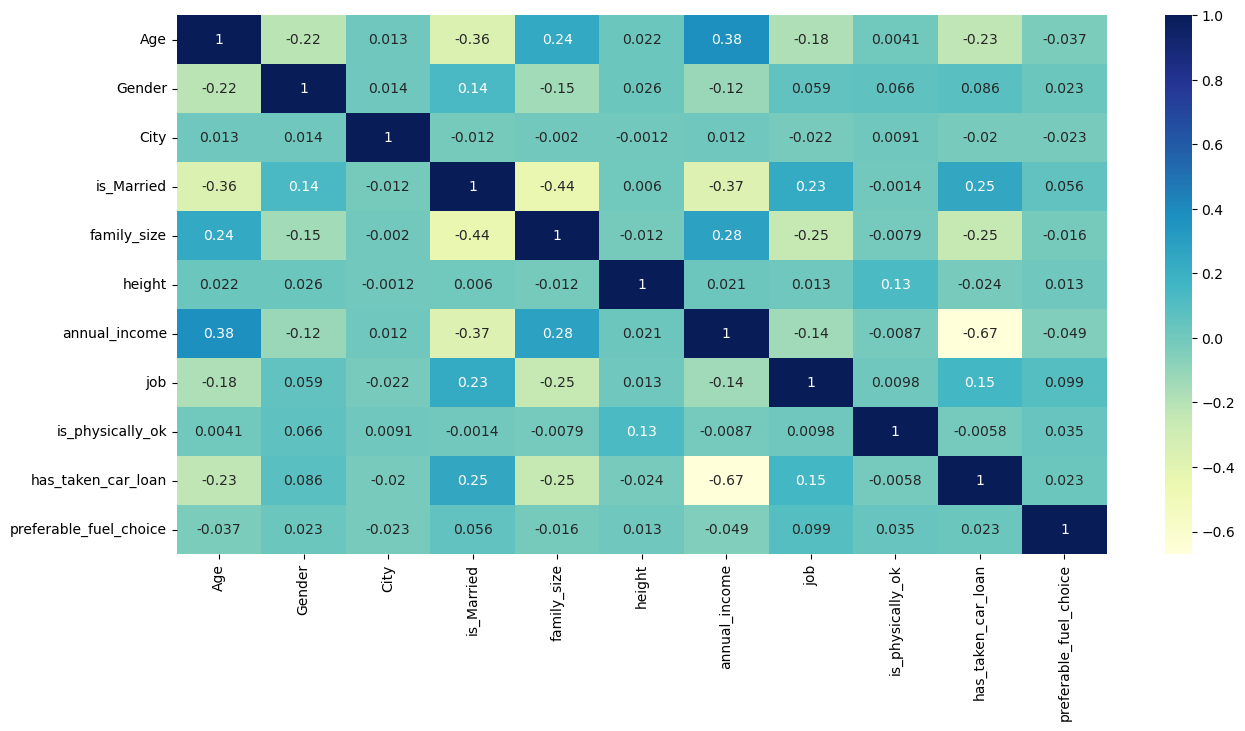

In [46]:
# Checking for correlation
cor_mat=df_test1.corr()
fig=plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True,cmap='YlGnBu')
plt.show()

### model

In [57]:
from imblearn.under_sampling import RandomUnderSampler
x= df_train1.drop(['vehicle_choice'], axis=1)
y = df_train1['vehicle_choice']

In [59]:
from sklearn.model_selection import train_test_split
  
# split into 70:30 ration
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [60]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model=log_model.fit(X_train,y_train)

C:\Users\ACER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [61]:
y_pred=log_model.predict(X_test)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [64]:
print('Accuracy is :',accuracy_score(y_test,y_pred))


Accuracy is : 0.22111111111111112


In [66]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)
pred_svm=svc.predict(X_test)
acc_svm=accuracy_score(y_test,pred_svm)*100
acc_svm

25.066666666666666

In [70]:
pred_test=svc.predict(df_test1)

In [72]:
loancsv =pd.DataFrame({"CustomerID":df_test["CustomerID"],"vehicle_choice":pred_test})

KeyError: 'CustomerID'